In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install lightgbm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import datetime
from datetime import date
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb_
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")


import sys 

In [58]:
!unzip /content/drive/MyDrive/EXABY/DATA_SET.zip -d EXABY

Archive:  /content/drive/MyDrive/EXABY/DATA_SET.zip
   creating: EXABY/DATA_SET/
  inflating: EXABY/DATA_SET/Anuncios_usados.csv  
  inflating: EXABY/DATA_SET/Consumos_emisiones.csv  
  inflating: EXABY/DATA_SET/Modelos.json  
  inflating: EXABY/DATA_SET/Precio_historico.xml  
  inflating: EXABY/DATA_SET/Tablas y Variables v2.pdf  
  inflating: EXABY/DATA_SET/Tipo_de_cambio.csv  
  inflating: EXABY/DATA_SET/Ventas_nuevas.json  
  inflating: EXABY/DATA_SET/Versiones.csv  


In [122]:
data = pd.read_table('/content/drive/MyDrive/EXABY/full_df.csv', delimiter = ',')


In [123]:
versiones = pd.read_table('/content/EXABY/DATA_SET/Versiones.csv', delimiter = ',')

In [124]:
data.drop(columns=data.columns[0], axis=1, inplace=True) 

In [125]:
data.Reg_year = data.Reg_year.astype(int) 
data.Runned_Miles = data.Runned_Miles.replace('1 mile', 1)
data.Runned_Miles = data.Runned_Miles.astype(int) 
data.Engine_power = data.Engine_power.round(3) 
data.Average_mpg = data.Average_mpg.round(3) 
data.Ad_price_GBP = data.Ad_price_GBP.round(3) 

# Clusterización

***Despues de definir el modelo de clusterizacion a implementar, aplicamos k-means para posteriormente organizar los valores por la clasificacion del modelo k-means y realizar la predicción.***

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209520 entries, 0 to 209519
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Genmodel_ID             209520 non-null  object 
 1   Adv_ID                  209520 non-null  object 
 2   Reg_year                209520 non-null  int64  
 3   Bodytype                209520 non-null  object 
 4   Runned_Miles            209520 non-null  int64  
 5   Gearbox                 209520 non-null  object 
 6   Fuel_type               209520 non-null  object 
 7   Engine_power            209520 non-null  float64
 8   Wheelbase               209520 non-null  float64
 9   Height                  209520 non-null  float64
 10  Width                   209520 non-null  float64
 11  Length                  209520 non-null  float64
 12  Average_mpg             209520 non-null  float64
 13  Top_speed               209520 non-null  float64
 14  Seat_num            

In [127]:
df = data.iloc[:, [2,4,7,8,9,10,11,12,13,14,15,17,18,19,20,23,22]] 

In [128]:
scaler = StandardScaler()

In [129]:
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)   

In [130]:
df.head() 

,Reg_year,Runned_Miles,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num,Ad_price_GBP,Engine_size,Entry_price_GBP,Gas_emission,Age,Percentage_devaluation
0,-2.841218,-0.561657,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476902,0.131882,-0.372274,1.031926,6.464613,6.666836,6.518888,2.863529,-0.976593
1,-2.841218,-0.196791,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476902,0.131882,-0.372274,0.571506,6.464613,6.666836,6.518888,2.620575,-1.201614
2,-2.841218,-0.112416,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476902,0.131882,-0.372274,0.972996,3.302961,5.735993,5.109545,2.620575,-0.899333
3,-2.841218,-0.027037,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476902,0.131882,-0.372274,0.560453,6.464613,6.666836,6.518888,2.863529,-1.207016
4,-2.841218,0.122467,3.481406,1.340505,-0.105126,1.608635,2.541191,-2.706433,2.476902,0.131882,-0.372274,0.533044,6.464613,6.666836,6.518888,2.863529,-1.220412


In [131]:
#inversed = pd.DataFrame(scaler.inverse_transform(df.values), columns = df.columns, index = df.index) 

In [132]:
pca = PCA(n_components=10) 
pca.fit(df)  

PCA(n_components=10)

In [133]:
X_pca = pca.transform(df)   

In [134]:
result=pd.DataFrame(X_pca, columns=['PCA%i' % i for i in range(10)], index=df.index)

result  

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,11.725942,4.055185,1.424336,-1.186796,-0.624917,-0.014333,-0.251504,1.117888,0.084945,-3.048990
1,11.570355,4.272420,1.555266,-0.976882,-0.485545,-0.035949,-0.223659,0.773654,-0.028639,-2.864452
2,9.655950,3.711655,1.287174,-0.595318,-0.437819,-0.217259,-0.286216,1.419614,0.221707,-1.908729
3,11.572519,4.455430,1.584277,-0.939624,-0.460195,0.014390,-0.146929,0.807585,-0.019402,-2.814447
4,11.564454,4.522239,1.610395,-0.895718,-0.428030,0.052291,-0.089853,0.770220,-0.027798,-2.724089
...,...,...,...,...,...,...,...,...,...,...
209515,-1.314249,-0.076282,0.216879,1.505677,0.239294,1.493453,0.318136,-0.164153,-0.205130,-0.325883
209516,-1.188275,0.220188,0.277281,1.309100,0.177713,1.305300,0.142597,-0.204056,-0.288413,-0.071390
209517,-1.352012,0.068634,0.261612,1.583458,0.286722,1.494537,0.343650,-0.218267,-0.219359,-0.354842
209518,-1.364790,0.124295,0.279272,1.614206,0.306119,1.500036,0.359583,-0.239485,-0.224549,-0.353872


In [135]:
algoritmo =  KMeans(n_clusters= 5, init = 'k-means++',
                      max_iter= 300, n_init =10)
algoritmo.fit(result) 

KMeans(n_clusters=5)

<Figure size 1080x360 with 0 Axes>

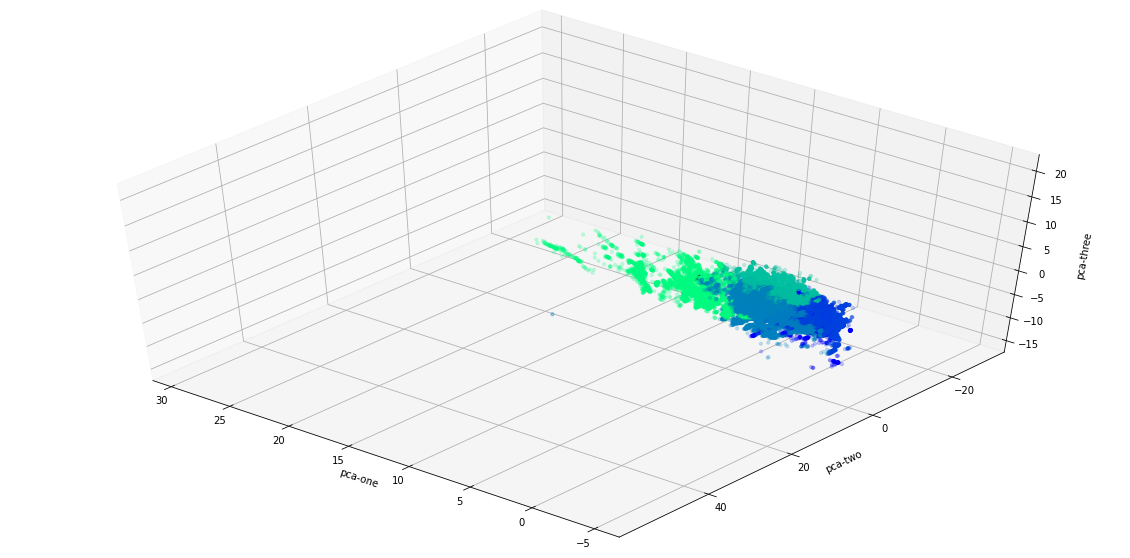

In [136]:
plt.figure(figsize=(15,5))
y_kmeans = algoritmo.predict(result)

ax = plt.figure(figsize=(20,10)).gca(projection='3d')

centers = algoritmo.cluster_centers_
ax.scatter(
    xs=centers[:, 0], 
    ys=centers[:, 1], 
    c = 'black',     
    alpha = 1, 
    s = 60,
    
)



ax.scatter(
    xs=result["PCA0"], 
    ys=result["PCA1"], 
    zs=result["PCA2"], 
    c = y_kmeans,  
    cmap='winter',
    s = 10,
    alpha = 0.2  
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

#rotacion de ejes
ax.azim = 300
ax.elev = 10

#limit
#ax.axes.set_xlim3d(min(result["PCA0"]),4e6)  
#ax.axes.set_ylim3d(min(result["PCA1"]),max(result["PCA1"]))
#ax.axes.set_zlim3d(0,400000) 

ax.zaxis.labelpad=10
ax.azim = 130   
ax.elev = 50

plt.show() 

In [137]:
#pca.inverse_transform(result)

In [138]:
np.unique(y_kmeans ) 

array([0, 1, 2, 3, 4], dtype=int32)

In [139]:
result["Cluster"] = y_kmeans

In [140]:
pd.set_option('display.max_rows', 100)
data['Cluster'] = y_kmeans
data.groupby('Cluster').describe().transpose().head(100)

Cluster                         0              1             2              3  \
Reg_year     count    3853.000000   85218.000000  6.481000e+04   47084.000000   
             mean     2011.969115    2013.946784  2.007027e+03    2014.451002   
             std         3.221380       2.359396  2.718333e+00       2.173319   
             min      2000.000000    2002.000000  2.000000e+03    2006.000000   
             25%      2010.000000    2012.000000  2.005000e+03    2013.000000   
             50%      2012.000000    2014.000000  2.007000e+03    2015.000000   
             75%      2014.000000    2016.000000  2.009000e+03    2016.000000   
             max      2019.000000    2019.000000  2.014000e+03    2019.000000   
Runned_Miles count    3853.000000   85218.000000  6.481000e+04   47084.000000   
             mean    58164.605243   35000.069129  9.351242e+04   39846.187580   
             std     35490.176024   24497.499744  4.866288e+04   29742.146575   
             min         1.000000       0.000000  1.080000e+02       0.000000   
             25%     31500.000000   15502.250000  7.100000e+04   15000.000000   
             50%     55128.000000   30000.000000  9.000000e+04   33426.500000   
             75%     81350.000000   49998.000000  1.120000e+05   58689.500000   
             max    260000.000000  271112.000000  6.363342e+06  232000.000000   
Engine_power count    3853.000000   85218.000000  6.481000e+04   47084.000000   
             mean      140.346956     101.579459  1.376415e+02     194.522161   
             std        33.921814      26.066830  4.902755e+01      55.906195   
             min        61.000000      44.000000  4.400000e+01      89.000000   
             25%       118.000000      82.000000  1.030000e+02     148.000000   
             50%       138.000000     103.000000  1.340000e+02     179.000000   
             75%       160.000000     115.000000  1.630000e+02     242.000000   
             max       382.680000     245.000000  4.070000e+02     449.000000   
Wheelbase    count    3853.000000   85218.000000  6.481000e+04   47084.000000   
             mean        6.257974    2539.377833  2.636820e+03    2807.364525   
             std        60.989604     135.027824  1.461688e+02     132.696063   
             min         0.000000     933.260870  1.420000e+03    1481.480000   
             25%         0.000000    2467.000000  2.540000e+03    2703.000000   
             50%         0.000000    2537.000000  2.640000e+03    2808.000000   
             75%         0.000000    2637.000000  2.728000e+03    2910.000000   
             max      1211.000000    4065.000000  3.498000e+03    5246.000000   
Height       count    3853.000000   85218.000000  6.481000e+04   47084.000000   
             mean     1510.267469    1520.147370  1.511123e+03    1600.539667   
             std       376.339756      74.127071  1.253045e+02     136.977267   
             min         0.000000     889.200000  0.000000e+00    1297.000000   
             25%      1433.000000    1470.000000  1.430000e+03    1468.000000   
             50%      1655.000000    1495.000000  1.470000e+03    1624.000000   
             75%      1710.000000    1565.000000  1.585000e+03    1703.000000   
             max      1990.000000    1862.000000  2.660000e+03    2168.000000   
Width        count    3853.000000   85218.000000  6.481000e+04   47084.000000   
             mean     1933.650063    1837.635700  1.850406e+03    2008.027755   
             std       153.312402     136.986109  1.287390e+02     121.219810   
             min      1595.000000    1515.000000  1.490000e+03    1589.000000   
             25%      1839.000000    1748.000000  1.760000e+03    1885.000000   
             50%      1842.000000    1810.000000  1.820000e+03    2031.000000   
             75%      2107.000000    1946.000000  1.958000e+03    2096.000000   
             max      2194.000000    2137.000000  2.690000e+03    2365.000000   
Length       count    3853.0000

In [141]:
data.groupby('Cluster').describe().transpose().tail(100)

Cluster                                  0             1             2  \
Average_mpg            25%       44.000000     51.000000     36.000000   
                       50%       47.000000     57.000000     42.000000   
                       75%       56.000000     65.000000     48.000000   
                       max      156.000000    200.000000     76.000000   
Top_speed              count   3853.000000  85218.000000  64810.000000   
                       mean     120.764652    111.511527    122.105610   
                       std       11.729554      9.937637     14.676918   
                       min       84.000000     11.000000     84.000000   
                       25%      112.000000    106.000000    112.000000   
                       50%      118.000000    111.357143    121.000000   
                       75%      130.000000    117.000000    130.165217   
                       max      180.000000    183.000000    183.000000   
Seat_num               count   3853.000000  85218.000000  64810.000000   
                       mean       5.208149      4.805170      4.923823   
                       std        1.161321      0.603725      0.847185   
                       min        2.000000      1.000000      2.000000   
                       25%        5.000000      5.000000      5.000000   
                       50%        5.000000      5.000000      5.000000   
                       75%        5.000000      5.000000      5.000000   
                       max        9.000000      7.000000      9.000000   
Door_num               count   3853.000000  85218.000000  64810.000000   
                       mean       4.264469      4.476273      4.247817   
                       std        1.210407      0.914299      1.055576   
                       min        2.000000      2.000000      2.000000   
                       25%        3.000000      4.000000      3.000000   
                       50%        5.000000      5.000000      5.000000   
                       75%        5.000000      5.000000      5.000000   
                       max        7.000000      6.000000      5.000000   
Ad_price_GBP           count   3853.000000  85218.000000  64810.000000   
                       mean    9709.854618   8258.640785   3664.545893   
                       std     6678.869666   3756.326907   2646.213642   
                       min      387.545000    485.658000     98.396000   
                       25%     6372.425000   5603.658000   1596.256250   
                       50%     7990.762000   7739.342000   2970.174000   
                       75%    10624.087000  10301.841000   4961.880000   
                       max    59958.204000  31477.897000  24528.194000   
Engine_size            count   3853.000000  85218.000000  64810.000000   
                       mean       1.818168      1.414725      1.925024   
                       std        0.310189      0.275236      0.526139   
                       min        0.700000      0.600000      0.600000   
                       25%        1.600000      1.200000      1.600000   
                       50%        2.000000      1.400000      1.900000   
                       75%        2.000000      1.600000      2.000000   
                       max        5.500000      2.400000      5.700000   
Entry_price_GBP        count   3853.000000  85218.000000  64810.000000   
                       mean   23712.731720  17282.666659  20627.166506   
                       std     6478.799520   5181.915532   8829.746583   
                       min     8198.000000   5853.000000   5382.000000   
                       25%    21019.378788  13426.262136  14486.458333   
                       50%    23620.812500  17215.000000  19092.846154   
                       75%    25412.222222  20881.250000  24658.774194   
                       max    69071.400000  48966.666667  78797.000000   
Gas_emission           count   3853.000000  85218.000000  64810.000000   
    

Cluster 0: Mean Age 6 (3853 samples)
           2nd Most seat nums (>5 in mean)
           AVERAGE CARS

Cluster 1: Mean Age 4 (85218 samples)
           Least Gas emissions
           Smallest engine size
           Least runned miles
           SMALL CARS

Cluster 2: Mean Age 11 (64810 samples)
           Greatest runned miles
           AVERAGE OLD cars 

Cluster 3: Mean Age 3.5 (47084 samples)
           Most seat nums (>5 in mean)
           2nd fastest top speed
           biggest
           FAMILIAR/MINI-VAN

Cluster 4: Mean Age 6.5 (855 samples)
           Most Gas Emissions (++)
           Biggest engine size (++)
           Most engine power (++)
           Fastest top speed
           Only one with door num < 3
           SPORTS CARS

(++) by great difference

In [142]:
data.dtypes

Genmodel_ID                object
Adv_ID                     object
Reg_year                    int64
Bodytype                   object
Runned_Miles                int64
Gearbox                    object
Fuel_type                  object
Engine_power              float64
Wheelbase                 float64
Height                    float64
Width                     float64
Length                    float64
Average_mpg               float64
Top_speed                 float64
Seat_num                  float64
Door_num                  float64
Ad_Date                    object
Ad_price_GBP              float64
Engine_size               float64
Entry_price_GBP           float64
Gas_emission              float64
Tot_devaluation           float64
Percentage_devaluation    float64
Age                       float64
Tot_Dev_PerYear           float64
Per_Dev_PerYear           float64
Cluster                     int32
dtype: object

In [143]:
result["Percentage_devaluation"] = data['Percentage_devaluation'] 


In [144]:
result 

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,Cluster,Percentage_devaluation
0,11.725942,4.055185,1.424336,-1.186796,-0.624917,-0.014333,-0.251504,1.117888,0.084945,-3.048990,4,-0.817808
1,11.570355,4.272420,1.555266,-0.976882,-0.485545,-0.035949,-0.223659,0.773654,-0.028639,-2.864452,4,-0.867463
2,9.655950,3.711655,1.287174,-0.595318,-0.437819,-0.217259,-0.286216,1.419614,0.221707,-1.908729,4,-0.800759
3,11.572519,4.455430,1.584277,-0.939624,-0.460195,0.014390,-0.146929,0.807585,-0.019402,-2.814447,4,-0.868655
4,11.564454,4.522239,1.610395,-0.895718,-0.428030,0.052291,-0.089853,0.770220,-0.027798,-2.724089,4,-0.871611
...,...,...,...,...,...,...,...,...,...,...,...,...
209515,-1.314249,-0.076282,0.216879,1.505677,0.239294,1.493453,0.318136,-0.164153,-0.205130,-0.325883,1,-0.700386
209516,-1.188275,0.220188,0.277281,1.309100,0.177713,1.305300,0.142597,-0.204056,-0.288413,-0.071390,1,-0.748771
209517,-1.352012,0.068634,0.261612,1.583458,0.286722,1.494537,0.343650,-0.218267,-0.219359,-0.354842,1,-0.752698
209518,-1.364790,0.124295,0.279272,1.614206,0.306119,1.500036,0.359583,-0.239485,-0.224549,-0.353872,1,-0.770565


**Se separa el dataset por clusters para posteriormente realizar en train test split y entrenar los modelos de regresion**

In [145]:
df1 = result[result["Cluster"] == 0]
df2 = result[result["Cluster"] == 1]
df3 = result[result["Cluster"] == 2] 
df4 = result[result["Cluster"] == 3] 
df5 = result[result["Cluster"] == 4] 

In [146]:
X = df1.drop(["Percentage_devaluation"], axis = 1)
y = df1.Percentage_devaluation

X1 = df2.drop(["Percentage_devaluation"], axis = 1)
y1 = df2.Percentage_devaluation

X2 = df3.drop(["Percentage_devaluation"], axis = 1)
y2 = df3.Percentage_devaluation

X3 = df4.drop(["Percentage_devaluation"], axis = 1)
y3 = df4.Percentage_devaluation

X4 = df5.drop(["Percentage_devaluation"], axis = 1)
y4 = df5.Percentage_devaluation

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=42) 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=42) 
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.30, random_state=42)

# Modelos de regresion 

## Modelos lineal, knn, arbol 

In [148]:
def modelitos(X_train, y_train, X_test, y_test, n_maxprof, n_knn):
  '''
  Arguments:
  X_train -- datos de entrenamiento de las variables 
  y_train -- dato de entrenamiento de la variable a predecir



  '''

  modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']
  linear_model = LinearRegression()
  tree_regressor = DecisionTreeRegressor(max_depth = n_maxprof)
  knn_regressor = KNeighborsRegressor(n_neighbors = n_knn)

  knn_regressor.fit(X_train, y_train)
  tree_regressor.fit(X_train, y_train)
  linear_model.fit(X_train, y_train)

  for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
      
    print(f'Modelo: {modelos[i]}')
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test =r2_score(y_test, y_test_pred)
    print(f'Error porcentual absoluto medio en Train: {mape_train}')
    print(f'Error porcentual absoluto medio en Test: {mape_test}') 
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'r2 score en Train: {r2_train}')
    print(f'r2 score en Test: {r2_test}')
    
    
    print("")

***Cluster = 0***

In [149]:
modelitos(X_train,y_train,X_test, y_test, n_maxprof=5, n_knn=5) 

Modelo: Regresión lineal
Error porcentual absoluto medio en Train: 0.2958311192205967
Error porcentual absoluto medio en Test: 0.12383284197035865
Raíz del error cuadrático medio en Train: 0.05939010931466573
Raíz del error cuadrático medio en Test: 0.06220431156628405
r2 score en Train: 0.8808354292226417
r2 score en Test: 0.8617597267009378

Modelo: Árbol de Decisión
Error porcentual absoluto medio en Train: 0.1447722021688835
Error porcentual absoluto medio en Test: 0.1071315765864193
Raíz del error cuadrático medio en Train: 0.055756691169482155
Raíz del error cuadrático medio en Test: 0.06507792318806178
r2 score en Train: 0.8949701150366682
r2 score en Test: 0.8486923181040967

Modelo: Vecinos más cercanos
Error porcentual absoluto medio en Train: 0.04672773980448776
Error porcentual absoluto medio en Test: 0.054665146264911216
Raíz del error cuadrático medio en Train: 0.0298971031997526
Raíz del error cuadrático medio en Test: 0.03969355743543897
r2 score en Train: 0.96980207342

***cluster = 1***

In [150]:
modelitos(X_train1,y_train1,X_test1, y_test1, n_maxprof=5, n_knn=5) 

Modelo: Regresión lineal
Error porcentual absoluto medio en Train: 0.09655691760397492
Error porcentual absoluto medio en Test: 0.13479462763904995
Raíz del error cuadrático medio en Train: 0.04197165132392748
Raíz del error cuadrático medio en Test: 0.0425133466512703
r2 score en Train: 0.9199456146361114
r2 score en Test: 0.9172178095776278

Modelo: Árbol de Decisión
Error porcentual absoluto medio en Train: 0.16633851071606215
Error porcentual absoluto medio en Test: 0.2010791927945395
Raíz del error cuadrático medio en Train: 0.06615744373031263
Raíz del error cuadrático medio en Test: 0.06711652777867178
r2 score en Train: 0.8011019858827307
r2 score en Test: 0.7936781198491855

Modelo: Vecinos más cercanos
Error porcentual absoluto medio en Train: 0.04431858816471466
Error porcentual absoluto medio en Test: 0.05622231219220708
Raíz del error cuadrático medio en Train: 0.021758066437029013
Raíz del error cuadrático medio en Test: 0.02864878898639844
r2 score en Train: 0.9784863741

***Cluster = 2***

In [151]:
modelitos(X_train2,y_train2,X_test2, y_test2, n_maxprof=5, n_knn=2) 

Modelo: Regresión lineal
Error porcentual absoluto medio en Train: 0.038037047620793844
Error porcentual absoluto medio en Test: 0.03861689098811014
Raíz del error cuadrático medio en Train: 0.03939313291909564
Raíz del error cuadrático medio en Test: 0.04065323223059054
r2 score en Train: 0.8152282904827873
r2 score en Test: 0.8063434189600884

Modelo: Árbol de Decisión
Error porcentual absoluto medio en Train: 0.05198465926188434
Error porcentual absoluto medio en Test: 0.05375942170819622
Raíz del error cuadrático medio en Train: 0.05353519503284982
Raíz del error cuadrático medio en Test: 0.05595487822904601
r2 score en Train: 0.658749565960509
r2 score en Test: 0.6331250931594561

Modelo: Vecinos más cercanos
Error porcentual absoluto medio en Train: 0.014287204719395
Error porcentual absoluto medio en Test: 0.027359864318855166
Raíz del error cuadrático medio en Train: 0.015954023924491058
Raíz del error cuadrático medio en Test: 0.030255372596915173
r2 score en Train: 0.96969356

***Cluster = 3***

In [152]:
modelitos(X_train3,y_train3,X_test3, y_test3, n_maxprof=5, n_knn=3) 

Modelo: Regresión lineal
Error porcentual absoluto medio en Train: 0.25807174766848584
Error porcentual absoluto medio en Test: 0.5593367654394619
Raíz del error cuadrático medio en Train: 0.055839070649093665
Raíz del error cuadrático medio en Test: 0.05485593493654528
r2 score en Train: 0.9155547205870351
r2 score en Test: 0.9142592583927621

Modelo: Árbol de Decisión
Error porcentual absoluto medio en Train: 0.31443852809518386
Error porcentual absoluto medio en Test: 1.3155676908474927
Raíz del error cuadrático medio en Train: 0.07308779003419931
Raíz del error cuadrático medio en Test: 0.07453447689590352
r2 score en Train: 0.8553266045216776
r2 score en Test: 0.8417096612522239

Modelo: Vecinos más cercanos
Error porcentual absoluto medio en Train: 0.04992598243326619
Error porcentual absoluto medio en Test: 0.14205676682502777
Raíz del error cuadrático medio en Train: 0.019461569267002658
Raíz del error cuadrático medio en Test: 0.029449812613782815
r2 score en Train: 0.98974218

***Cluster = 4***

In [153]:
modelitos(X_train4,y_train4,X_test4, y_test4, n_maxprof=5, n_knn=5) 

Modelo: Regresión lineal
Error porcentual absoluto medio en Train: 4.227867806288759
Error porcentual absoluto medio en Test: 0.3545843006245768
Raíz del error cuadrático medio en Train: 0.08522029621512561
Raíz del error cuadrático medio en Test: 0.08614959034430214
r2 score en Train: 0.9334016783702427
r2 score en Test: 0.9380628685528987

Modelo: Árbol de Decisión
Error porcentual absoluto medio en Train: 6.520558356921332
Error porcentual absoluto medio en Test: 0.5657008943495078
Raíz del error cuadrático medio en Train: 0.09383443047117887
Raíz del error cuadrático medio en Test: 0.13580223221928817
r2 score en Train: 0.9192576007227106
r2 score en Test: 0.8460929650286044

Modelo: Vecinos más cercanos
Error porcentual absoluto medio en Train: 1.1459179489902191
Error porcentual absoluto medio en Test: 0.1404137662471541
Raíz del error cuadrático medio en Train: 0.04030891281481192
Raíz del error cuadrático medio en Test: 0.10718312769044773
r2 score en Train: 0.9851002364919298


## Cross Validation

***cluster = 0*** 

In [169]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    dtr = DecisionTreeRegressor(max_depth=profundidad)
    tree_scores = cross_validate(dtr, X, y, cv=5, return_train_score=True,scoring='neg_mean_absolute_error')     
    
    tree_train_scores_mean.append(abs(tree_scores['train_score']).mean())
    tree_train_scores_std.append(abs(tree_scores['train_score']).std())
    
    tree_test_scores_mean.append(abs(tree_scores['test_score']).mean()) 
    tree_test_scores_std.append(abs(tree_scores['test_score']).std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

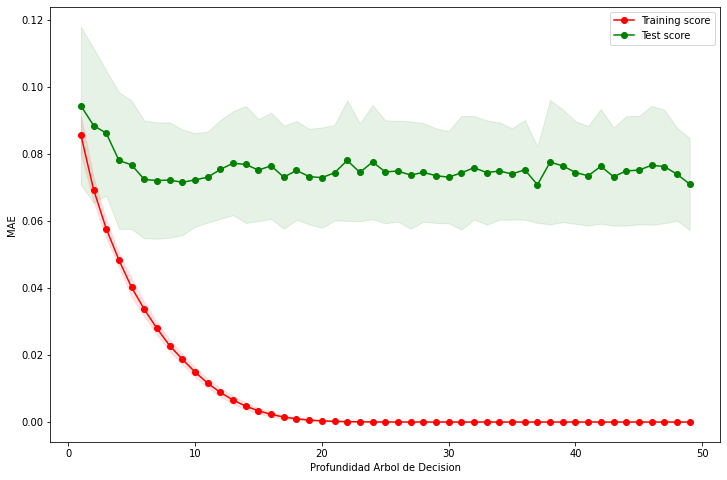

In [170]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('MAE')
plt.xlabel('Profundidad Arbol de Decision') 
plt.show() 

***cluster = 1***

In [171]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    dtr = DecisionTreeRegressor(max_depth=profundidad)
    tree_scores = cross_validate(dtr, X1, y1, cv=5, return_train_score=True,scoring='neg_mean_absolute_error')     
    
    tree_train_scores_mean.append(abs(tree_scores['train_score']).mean())
    tree_train_scores_std.append(abs(tree_scores['train_score']).std())
    
    tree_test_scores_mean.append(abs(tree_scores['test_score']).mean()) 
    tree_test_scores_std.append(abs(tree_scores['test_score']).std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

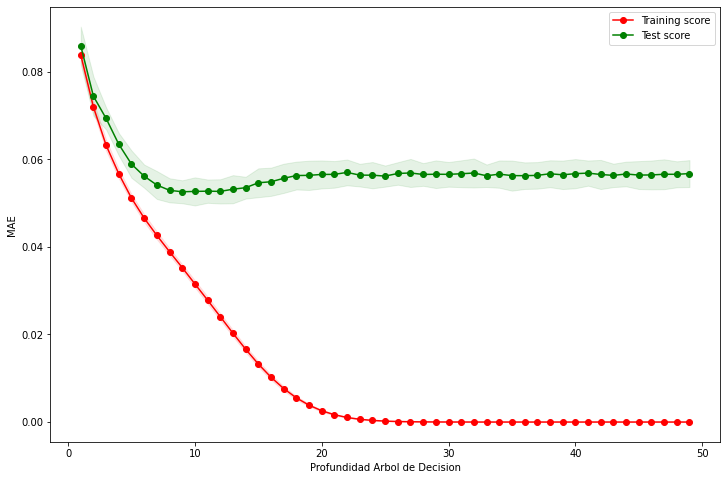

In [172]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('MAE')
plt.xlabel('Profundidad Arbol de Decision') 
plt.show() 

***Custer = 2***

In [179]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    dtr = DecisionTreeRegressor(max_depth=profundidad)
    tree_scores = cross_validate(dtr, X2, y2, cv=5, return_train_score=True,scoring='neg_mean_absolute_error')     
    
    tree_train_scores_mean.append(abs(tree_scores['train_score']).mean())
    tree_train_scores_std.append(abs(tree_scores['train_score']).std())
    
    tree_test_scores_mean.append(abs(tree_scores['test_score']).mean()) 
    tree_test_scores_std.append(abs(tree_scores['test_score']).std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

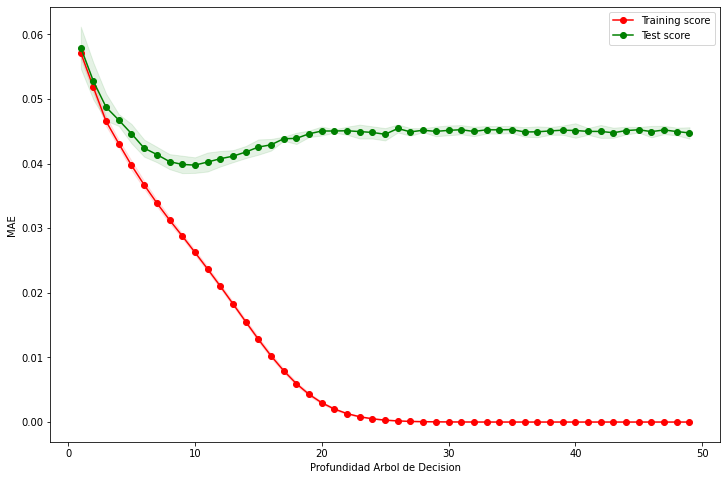

In [180]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('MAE')
plt.xlabel('Profundidad Arbol de Decision') 
plt.show() 

***cluster = 3*** 

In [181]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    dtr = DecisionTreeRegressor(max_depth=profundidad)
    tree_scores = cross_validate(dtr, X3, y3, cv=5, return_train_score=True,scoring='neg_mean_absolute_error')     
    
    tree_train_scores_mean.append(abs(tree_scores['train_score']).mean())
    tree_train_scores_std.append(abs(tree_scores['train_score']).std())
    
    tree_test_scores_mean.append(abs(tree_scores['test_score']).mean()) 
    tree_test_scores_std.append(abs(tree_scores['test_score']).std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

***cluster = 4*** 

In [182]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    dtr = DecisionTreeRegressor(max_depth=profundidad)
    tree_scores = cross_validate(dtr, X4, y4, cv=5, return_train_score=True,scoring='neg_mean_absolute_error')     
    
    tree_train_scores_mean.append(abs(tree_scores['train_score']).mean())
    tree_train_scores_std.append(abs(tree_scores['train_score']).std())
    
    tree_test_scores_mean.append(abs(tree_scores['test_score']).mean()) 
    tree_test_scores_std.append(abs(tree_scores['test_score']).std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

## Random Forest 

***cluster = 0***

In [183]:
rf0 = RandomForestRegressor(n_estimators=85, random_state= 42) 
rf0.fit(X_train, y_train)  
y_train_pred_0 = rf0.predict(X_train) 
y_test_pred_0 = rf0.predict(X_test)

mape_train_rf_0 = mean_absolute_percentage_error(y_train, y_train_pred_0)
mape_test_rf_0 = mean_absolute_percentage_error(y_test, y_test_pred_0)
r2_train_rf_0 = r2_score(y_train, y_train_pred_0)
r2_test_rf_0 =  r2_score(y_test, y_test_pred_0)
mse_train_rf_0 = mean_absolute_error(y_train, y_train_pred_0)
mse_test_rf_0 = mean_absolute_error(y_test, y_test_pred_0) 

print(f'Error porcentual absoluto medio en Train: {mape_train_rf_0}')
print(f'Error porcentual absoluto medio en Test: {mape_test_rf_0}') 
print(f'r2 score en Train: {r2_train_rf_0}')
print(f'r2 score en Test: {r2_test_rf_0}')
print(f'MAE score en Train: {mse_train_rf_0}')
print(f'MAE score en Test: {mse_test_rf_0}')
print("")

Error porcentual absoluto medio en Train: 0.019998186768341805
Error porcentual absoluto medio en Test: 0.039240590593215885
r2 score en Train: 0.9952963828839577
r2 score en Test: 0.9634239441343961
MAE score en Train: 0.006493242551052359
MAE score en Test: 0.018098967461566893



<function matplotlib.pyplot.show(*args, **kw)>

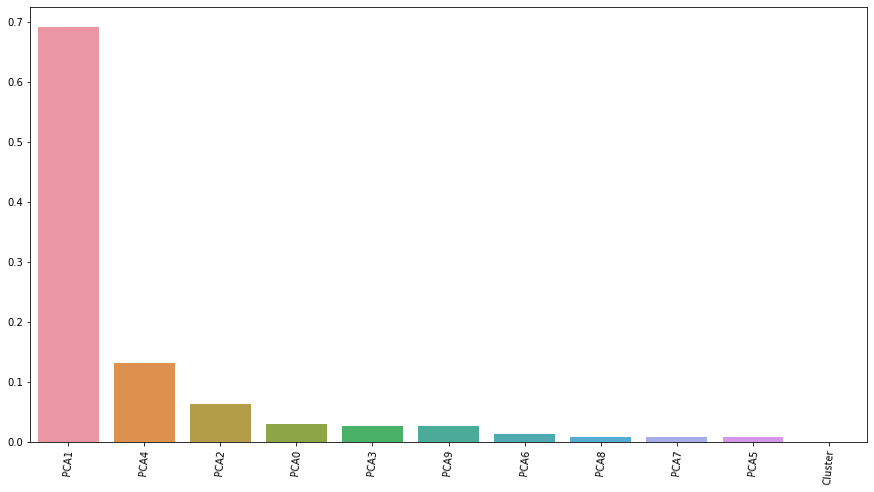

In [184]:
importances = rf0.feature_importances_ 
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8)) 
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show 

***Cluster = 1***

In [185]:
rf = RandomForestRegressor(n_estimators=85, random_state= 42) 
rf.fit(X_train1, y_train1)  
y_train_pred = rf.predict(X_train1) 
y_test_pred = rf.predict(X_test1)

mape_train_rf = mean_absolute_percentage_error(y_train1, y_train_pred)
mape_test_rf = mean_absolute_percentage_error(y_test1, y_test_pred)
r2_train_rf = r2_score(y_train1, y_train_pred)
r2_test_rf =  r2_score(y_test1, y_test_pred)
mse_train_rf = mean_absolute_error(y_train1, y_train_pred)
mse_test_rf = mean_absolute_error(y_test1, y_test_pred) 

print(f'Error porcentual absoluto medio en Train: {mape_train_rf}')
print(f'Error porcentual absoluto medio en Test: {mape_test_rf}') 
print(f'r2 score en Train: {r2_train_rf}')
print(f'r2 score en Test: {r2_test_rf}')
print(f'MAE score en Train: {mse_train_rf}')
print(f'MAE score en Test: {mse_test_rf}')
print("")

Error porcentual absoluto medio en Train: 0.01751017510919537
Error porcentual absoluto medio en Test: 0.05124157357623237
r2 score en Train: 0.9960258508001469
r2 score en Test: 0.9698696136943818
MAE score en Train: 0.006014877330779373
MAE score en Test: 0.016201725985484736



<function matplotlib.pyplot.show(*args, **kw)>

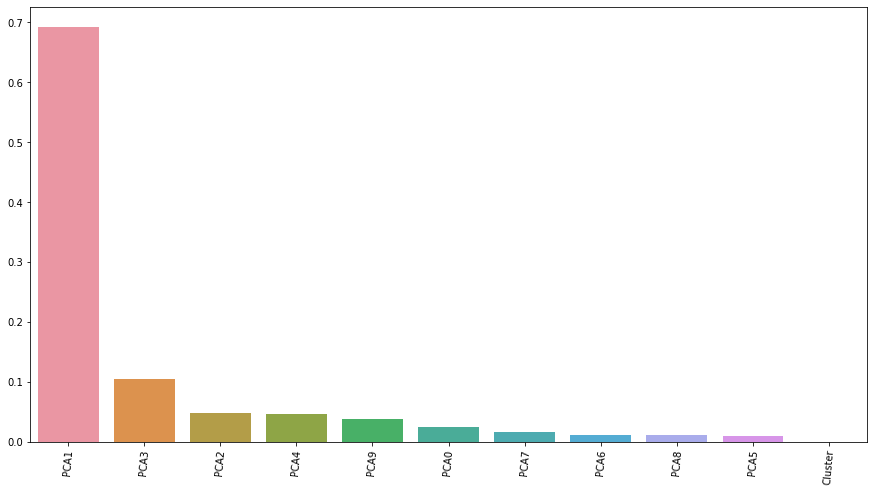

In [186]:
importances = rf.feature_importances_ 
columns = X_train1.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8)) 
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show 

***Cluster = 2***

In [187]:
rf2 = RandomForestRegressor(n_estimators=85, random_state= 42) 
rf2.fit(X_train2, y_train2)  
y_train_pred2 = rf2.predict(X_train2) 
y_test_pred2 = rf2.predict(X_test2)

mape_train_rf_2 = mean_absolute_percentage_error(y_train2, y_train_pred2)
mape_test_rf_2 = mean_absolute_percentage_error(y_test2, y_test_pred2)
r2_train_rf_2 = r2_score(y_train2, y_train_pred2)
r2_test_rf_2 =  r2_score(y_test2, y_test_pred2)
mse_train_rf_2 = mean_absolute_error(y_train2, y_train_pred2)
mse_test_rf_2 = mean_absolute_error(y_test2, y_test_pred2) 

print(f'Error porcentual absoluto medio en Train: {mape_train_rf_2}')
print(f'Error porcentual absoluto medio en Test: {mape_test_rf_2}') 
print(f'r2 score en Train: {r2_train_rf_2}')
print(f'r2 score en Test: {r2_test_rf_2}')
print(f'MAE score en Train: {mse_train_rf_2}')
print(f'MAE score en Test: {mse_test_rf_2}')
print("")

Error porcentual absoluto medio en Train: 0.009106699661200843
Error porcentual absoluto medio en Test: 0.024584865562511916
r2 score en Train: 0.9875593115205238
r2 score en Test: 0.9089159974130901
MAE score en Train: 0.007049189076331495
MAE score en Test: 0.018942718542801898



<function matplotlib.pyplot.show(*args, **kw)>

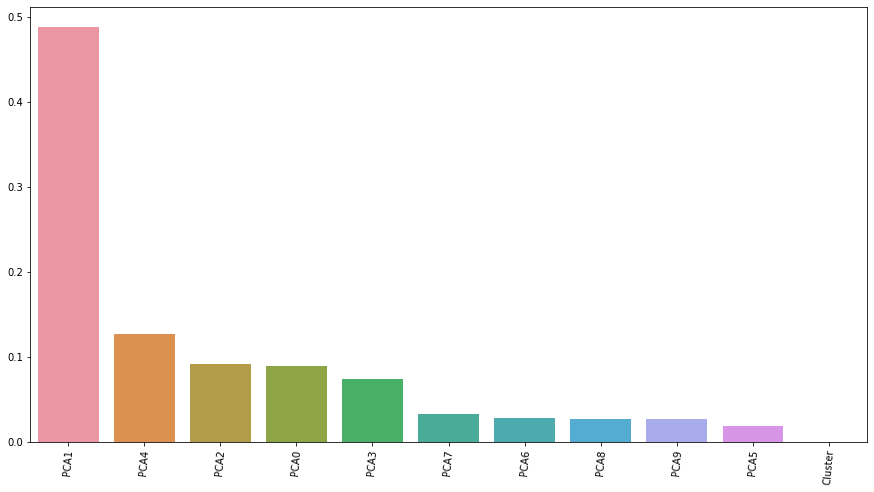

In [188]:
importances = rf2.feature_importances_ 
columns = X_train2.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8)) 
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show 

***Cluster = 3***

In [ ]:
rf3 = RandomForestRegressor(n_estimators=85, random_state= 42) 
rf3.fit(X_train3, y_train3)  
y_train_pred3 = rf3.predict(X_train3) 
y_test_pred3 = rf3.predict(X_test3)

mape_train_rf_3 = mean_absolute_percentage_error(y_train3, y_train_pred3)
mape_test_rf_3 = mean_absolute_percentage_error(y_test3, y_test_pred3)
r2_train_rf_3 = r2_score(y_train3, y_train_pred3)
r2_test_rf_3 =  r2_score(y_test3, y_test_pred3)
mse_train_rf_3 = mean_absolute_error(y_train3, y_train_pred3)
mse_test_rf_3 = mean_absolute_error(y_test3, y_test_pred3) 

print(f'Error porcentual absoluto medio en Train: {mape_train_rf_3}')
print(f'Error porcentual absoluto medio en Test: {mape_test_rf_3}') 
print(f'r2 score en Train: {r2_train_rf_3}')
print(f'r2 score en Test: {r2_test_rf_3}')
print(f'MAE score en Train: {mse_train_rf_3}')
print(f'MAE score en Test: {mse_test_rf_3}')
print("")

In [ ]:
importances = rf3.feature_importances_ 
columns = X_train3.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8)) 
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show 

***Cluster = 4***

In [ ]:
rf4 = RandomForestRegressor(n_estimators=85, random_state= 42) 
rf4.fit(X_train4, y_train4)  
y_train_pred4 = rf4.predict(X_train4) 
y_test_pred4 = rf4.predict(X_test4)

mape_train_rf_4 = mean_absolute_percentage_error(y_train4, y_train_pred4)
mape_test_rf_4 = mean_absolute_percentage_error(y_test4, y_test_pred4)
r2_train_rf_4 = r2_score(y_train4, y_train_pred4)
r2_test_rf_4 =  r2_score(y_test4, y_test_pred4)
mse_train_rf_4 = mean_absolute_error(y_train4, y_train_pred4)
mse_test_rf_4 = mean_absolute_error(y_test4, y_test_pred4) 

print(f'Error porcentual absoluto medio en Train: {mape_train_rf_4}')
print(f'Error porcentual absoluto medio en Test: {mape_test_rf_4}') 
print(f'r2 score en Train: {r2_train_rf_4}')
print(f'r2 score en Test: {r2_test_rf_4}')
print(f'MAE score en Train: {mse_train_rf_4}')
print(f'MAE score en Test: {mse_test_rf_4}')
print("")

In [ ]:
importances = rf4.feature_importances_ 
columns = X_train4.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8)) 
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show 

# Stratification of datasets for visualization

In [155]:
abs(data.corr()['Percentage_devaluation']).sort_values()

Wheelbase                 0.015033
Length                    0.022191
Door_num                  0.039668
Engine_size               0.051158
Seat_num                  0.058690
Height                    0.073547
Cluster                   0.080782
Tot_Dev_PerYear           0.137653
Top_speed                 0.160676
Gas_emission              0.193291
Width                     0.198690
Average_mpg               0.231353
Engine_power              0.235517
Entry_price_GBP           0.279945
Per_Dev_PerYear           0.303779
Tot_devaluation           0.396500
Ad_price_GBP              0.584312
Runned_Miles              0.691940
Reg_year                  0.798098
Age                       0.798930
Percentage_devaluation    1.000000
Name: Percentage_devaluation, dtype: float64

In [156]:
data.drop(columns=['Wheelbase','Length','Door_num','Engine_size','Seat_num','Height','Reg_year'], inplace = True)

In [157]:
data_viz = data.groupby('Cluster', group_keys=False).apply(lambda x: x.sample(frac=0.6))
versiones_viz = versiones.groupby(['Genmodel_ID','Year','Fuel_type','Engine_size'], group_keys=False).apply(lambda x: x.sample(frac=0.6))

In [159]:
data_viz.columns

Index(['Genmodel_ID', 'Adv_ID', 'Bodytype', 'Runned_Miles', 'Gearbox',
       'Fuel_type', 'Engine_power', 'Width', 'Average_mpg', 'Top_speed',
       'Ad_Date', 'Ad_price_GBP', 'Entry_price_GBP', 'Gas_emission',
       'Tot_devaluation', 'Percentage_devaluation', 'Age', 'Tot_Dev_PerYear',
       'Per_Dev_PerYear', 'Cluster'],
      dtype='object')

In [160]:
data_viz['Percentage_devaluation'] = data_viz['Percentage_devaluation'] * 100
data_viz['Per_Dev_PerYear'] = data_viz['Per_Dev_PerYear'] * 100

In [176]:
data_viz['Percentage_devaluation'] = data_viz['Percentage_devaluation'].astype(int)
data_viz['Runned_Miles'] = data_viz['Runned_Miles'].astype(int)
data_viz['Engine_power'] = data_viz['Engine_power'].astype(int)
data_viz['Width'] = data_viz['Width'].astype(int)
data_viz['Average_mpg'] = data_viz['Average_mpg'].astype(int)
data_viz['Top_speed'] = data_viz['Top_speed'].astype(int)
data_viz['Tot_devaluation'] = data_viz['Tot_devaluation'].astype(int)
data_viz['Age'] = data_viz['Age'].astype(int)
data_viz['Tot_Dev_PerYear'] = data_viz['Tot_Dev_PerYear'].astype(int)
data_viz['Per_Dev_PerYear'] = data_viz['Per_Dev_PerYear'].astype(int)
data_viz['Gas_emission'] = data_viz['Gas_emission'].astype(int)
data_viz['Entry_price_GBP'] = data_viz['Entry_price_GBP'].astype(int)
data_viz['Ad_price_GBP'] = data_viz['Ad_price_GBP'].astype(int)

In [177]:
data_viz

,Genmodel_ID,Adv_ID,Bodytype,Runned_Miles,Gearbox,Fuel_type,Engine_power,Width,Average_mpg,Top_speed,Ad_Date,Ad_price_GBP,Entry_price_GBP,Gas_emission,Tot_devaluation,Percentage_devaluation,Age,Tot_Dev_PerYear,Per_Dev_PerYear,Cluster
30775,29_25,29_25$$900,SUV,77000,Manual,Diesel,134,1842,44,112,2018-07-01,6998,22364,163,-15366,-68,9,-1707,-7,0
27975,29_20,29_20$$107,MPV,39050,Manual,Petrol,180,2067,44,134,2018-05-01,11605,23400,149,-11794,-50,4,-2948,-12,0
37499,29_31,29_31$$164,MPV,18000,Automatic,Diesel,148,2137,56,122,2018-07-01,18012,31468,139,-13456,-42,2,-6728,-21,0
39012,34_1,34_1$$178,Coupe,82000,Automatic,Petrol,145,1785,28,124,2018-04-01,932,20029,211,-19097,-95,18,-1060,-5,0
30509,29_25,29_25$$1086,SUV,102300,Manual,Diesel,134,1842,44,112,2017-11-01,4856,20324,164,-15468,-76,9,-1718,-8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55640,39_9,39_9$$31,Coupe,40910,Automatic,Petrol,300,1892,25,155,2018-07-01,14317,64915,277,-50597,-77,12,-4216,-6,4
113116,71_4,71_4$$1128,Coupe,92000,Manual,Petrol,345,1808,28,179,2018-08-01,30789,70027,235,-39238,-56,9,-4359,-6,4
152055,8_14,8_14$$783,Saloon,4146,Automatic,Petrol,404,2169,28,155,2018-04-01,44809,78081,187,-33271,-42,1,-33271,-42,4
115490,71_9,71_9$$331,Coupe,31000,Manual,Petrol,295,1801,26,171,2018-05-01,18941,44885,258,-25943,-57,12,-2161,-4,4


In [178]:
data_viz.to_csv('final_clusters.csv')
versiones_viz.to_csv('final_versiones.csv')